In [1]:
import pandas as pd

#Imdb dataset
imdb_title_basics = pd.read_csv('../data/title.basics.csv')
imdb_title_akas = pd.read_csv('../data/title.akas.csv')
imdb_title_crew = pd.read_csv('../data/title.crew.csv')
imdb_title_principals = pd.read_csv('../data/title.principals.csv')
imdb_name_basics = pd.read_csv('../data/name.basics.csv')
imdb_title_ratings = pd.read_csv('../data/title.ratings.csv')
#Rotten tomato dataset
rt_movie_info = pd.read_csv('../data/rt.movie_info.tsv', delimiter="\t")
rt_reviews = pd.read_csv('../data/rt.reviews.tsv', delimiter="\t", encoding='latin-1')
#Box office Mojo dataset
bom_movie_gross = pd.read_csv('../data/bom.movie_gross.csv')
#The movies DB dataset
tmdb_movies = pd.read_csv('../data/tmdb.movies.csv')
# The numbers dataset
tn_movies_budgets = pd.read_csv('../data/tn.movie_budgets.csv')


In [2]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_title_basics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [4]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
tn_movies_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## In order to make calculations we need to remove $ and , from our numeric values

In [6]:
tn_movies_budgets_comma_fixed = tn_movies_budgets.copy()
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace(',','').astype(int)
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace('$','')
tn_movies_budgets_comma_fixed['worldwide_gross'] = tn_movies_budgets_comma_fixed['worldwide_gross'].str.replace(',','').astype(int)


/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_3656/246117791.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['production_budget'] = tn_movies_budgets_comma_fixed['production_budget'].str.replace('$','')
/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_3656/246117791.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movies_budgets_comma_fixed['domestic_gross'] = tn_movies_budgets_comma_fixed['domestic_gross'].str.replace('$','')
/var/folders/6m/fl6mfqzj5wb0xc51g7g3k2700000gn/T/ipykernel_3656/246117791.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, sin

In [7]:
tn_movies_budgets_comma_fixed.sort_values('worldwide_gross', ascending = False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864
...,...,...,...,...,...,...
5474,75,"Dec 31, 2005",Insomnia Manica,500000,0,0
5473,74,"Jul 17, 2012",Girls Gone Dead,500000,0,0
5472,73,"Apr 3, 2012",Enter Nowhere,500000,0,0
5471,72,"Dec 31, 2010",Drones,500000,0,0


## Calculated profit margin percent to see how successful each movie is

In [8]:
tn_movies_budgets_comma_fixed['profit_margin_percent'] = ((tn_movies_budgets_comma_fixed['worldwide_gross']/tn_movies_budgets_comma_fixed['production_budget']) -1)*100

In [9]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-100.000000
5778,79,"Apr 2, 1999",Following,6000,48482,240495,3908.250000
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-100.000000


In [10]:
tn_movies_budgets_comma_fixed['year'] = tn_movies_budgets_comma_fixed['release_date'].apply(lambda x: x[-4:])
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017
...,...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-100.000000,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,3908.250000,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,-100.000000,2015


In [11]:
tn_movies_budgets_comma_fixed['name_year'] = tn_movies_budgets_comma_fixed['movie'] + ' ' + tn_movies_budgets_comma_fixed['year']

In [12]:
tn_movies_budgets_comma_fixed.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,name_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009,Avatar 2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,Pirates of the Caribbean: On Stranger Tides 2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,Dark Phoenix 2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,Avengers: Age of Ultron 2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017,Star Wars Ep. VIII: The Last Jedi 2017


In [13]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
imdb_title_basics['name_year'] = imdb_title_basics['primary_title'] + ' ' + imdb_title_basics['start_year'].astype(str)

In [15]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,name_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh 2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season 2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind 2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",Sabse Bada Sukh 2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",The Wandering Soap Opera 2017


In [16]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   name_year        146144 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 7.8+ MB


## Set the name_year as indev on both files to merge them on the index.
## We are merging to see the relation btw genres and profit margin percent

In [17]:
imdb_title_basics = imdb_title_basics.set_index('name_year')

In [18]:
tn_movies_budgets_comma_fixed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     5782 non-null   int64  
 1   release_date           5782 non-null   object 
 2   movie                  5782 non-null   object 
 3   production_budget      5782 non-null   int64  
 4   domestic_gross         5782 non-null   int64  
 5   worldwide_gross        5782 non-null   int64  
 6   profit_margin_percent  5782 non-null   float64
 7   year                   5782 non-null   object 
 8   name_year              5782 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 406.7+ KB


In [19]:
tn_movies_budgets_comma_fixed = tn_movies_budgets_comma_fixed.set_index('name_year')

In [20]:
tn_movies_budgets_comma_fixed

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year
name_year,,,,,,,,
Avatar 2009,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,553.257713,2009
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015
Star Wars Ep. VIII: The Last Jedi 2017,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,315.369636,2017
...,...,...,...,...,...,...,...,...
Red 11 2018,78,"Dec 31, 2018",Red 11,7000,0,0,-100.000000,2018
Following 1999,79,"Apr 2, 1999",Following,6000,48482,240495,3908.250000,1999
Return to the Land of Wonders 2005,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-73.240000,2005


In [21]:
genre_analysis = tn_movies_budgets_comma_fixed.merge(imdb_title_basics, right_on = 'name_year', left_on = 'name_year')

In [22]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy"


In [23]:
genre_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547 entries, Pirates of the Caribbean: On Stranger Tides 2011 to Stories of Our Lives 2014
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1547 non-null   int64  
 1   release_date           1547 non-null   object 
 2   movie                  1547 non-null   object 
 3   production_budget      1547 non-null   int64  
 4   domestic_gross         1547 non-null   int64  
 5   worldwide_gross        1547 non-null   int64  
 6   profit_margin_percent  1547 non-null   float64
 7   year                   1547 non-null   object 
 8   tconst                 1547 non-null   object 
 9   primary_title          1547 non-null   object 
 10  original_title         1547 non-null   object 
 11  start_year             1547 non-null   int64  
 12  runtime_minutes        1521 non-null   float64
 13  genres                 1541 non-null   object

In [24]:
genre_analysis['genres'] = genre_analysis['genres'].map(lambda x: str(x).split(','))

In [25]:
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres
name_year,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]"
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]"
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]"
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]"
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]"


## We use explode to create new lines for movies more than one genre

In [26]:
genre_analysis_genre = genre_analysis.explode('genres')

## Music and Musical genres seem to be the same

In [27]:
genre_analysis_genre['genres'] = genre_analysis_genre['genres'].map(lambda x: 'Musical' if x == 'Music' else x)
genre_analysis_genre['genres']

name_year
Pirates of the Caribbean: On Stranger Tides 2011       Action
Pirates of the Caribbean: On Stranger Tides 2011    Adventure
Pirates of the Caribbean: On Stranger Tides 2011      Fantasy
Dark Phoenix 2019                                      Action
Dark Phoenix 2019                                   Adventure
                                                      ...    
Dutch Kills 2015                                     Thriller
The Ridges 2011                                         Drama
The Ridges 2011                                        Horror
The Ridges 2011                                      Thriller
Stories of Our Lives 2014                               Drama
Name: genres, Length: 3887, dtype: object

In [28]:
genre_analysis_genre['production_budget_m'] = genre_analysis_genre['production_budget'].map(lambda x: x/1000000)
genre_analysis_genre['domestic_gross_m'] = genre_analysis_genre['domestic_gross'].map(lambda x: x/1000000)
genre_analysis_genre['worldwide_gross_m'] = genre_analysis_genre['worldwide_gross'].map(lambda x: x/1000000)

In [29]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


## Most successfull movies based on profitability

In [31]:
a = genre_analysis_genre.groupby('genres')['worldwide_gross'].sum().sort_values(ascending = False)
b = genre_analysis_genre.groupby('genres')['production_budget'].sum().sort_values(ascending = False)
(((a/b)-1)*100).sort_values(ascending = False, )

genres
Musical        344.904496
Animation      283.762651
Horror         273.572512
Sci-Fi         265.524775
Mystery        254.346757
Thriller       247.013279
Comedy         229.714013
Adventure      228.420088
Biography      211.624600
Romance        204.376690
Action         201.255946
Fantasy        187.154465
Family         186.977772
Documentary    171.964562
Drama          169.381279
Crime          149.161576
History        136.620548
Sport          113.914539
War            104.431061
Western         82.210885
nan             33.676478
Reality-TV    -100.000000
dtype: float64

## This shows how profitable the movie market is

In [32]:
a = genre_analysis_genre['worldwide_gross'].sum()
b = genre_analysis_genre['production_budget'].sum()
(a/b)-1

2.1558848404014745

## First glance at the most successful genres in the box office

In [34]:
genre_analysis_genre.groupby('genres')['worldwide_gross_m'].mean().sort_values(ascending = False)

genres
Animation      373.510168
Adventure      348.357792
Sci-Fi         342.937799
Fantasy        244.584974
Action         236.756048
Family         191.255581
Comedy         132.518192
Thriller       112.085094
Musical        111.103775
Western        104.655307
Mystery         88.541639
History         85.627061
Biography       80.803566
Crime           80.151038
Drama           71.911147
Horror          68.983606
Romance         67.494162
War             57.781838
Sport           51.520373
Documentary     39.049478
nan             36.989396
Reality-TV       0.000000
Name: worldwide_gross_m, dtype: float64

## Comparing the production budgets of 50 top movies and all movies in the database

In [37]:
action_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Action']

In [38]:
action_movies['production_budget_m'].head(50).mean()

222.12400000000002

In [39]:
adventure_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Adventure']

In [40]:
adventure_movies['production_budget_m'].head(50).mean()

228.21400000000003

In [41]:
horror_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Horror']

In [42]:
horror_movies['production_budget_m'].head(50).mean()

51.256

In [43]:
mystery_movies = genre_analysis_genre[genre_analysis_genre['genres'] == 'Mystery']

In [44]:
mystery_movies['production_budget_m'].head(50).mean()

52.02

In [45]:
genre_analysis_genre.groupby('genres')['production_budget_m'].mean().sort_values(ascending = False)

genres
Adventure      106.070793
Animation       97.328431
Sci-Fi          93.820672
Fantasy         85.175403
Action          78.589668
Family          66.644737
Western         57.436364
Comedy          40.191859
History         36.187500
Thriller        32.299944
Crime           32.168298
War             28.264706
nan             27.670833
Drama           26.694931
Biography       25.929778
Mystery         24.987286
Musical         24.972500
Sport           24.084559
Romance         22.174550
Horror          18.465921
Documentary     14.358296
Reality-TV       1.000000
Name: production_budget_m, dtype: float64

## Create a name_year column for bom movie gross dataframe to merge it. We need this dataframe because it has the studio column

In [48]:
bom_movie_gross['name_year'] = bom_movie_gross['title'] + ' ' + bom_movie_gross['year'].map(lambda x: str(x))

In [49]:
genre_analysis_genre.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m
name_year,,,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,410.6,241.063875,1045.663875
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,410.6,241.063875,1045.663875
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,350.0,42.762350,149.762350
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Adventure,350.0,42.762350,149.762350


In [50]:
genre_analysis_studio = genre_analysis_genre.merge(bom_movie_gross, how = 'inner', on = 'name_year')

In [51]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,runtime_minutes,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,136.0,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,136.0,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,136.0,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,...,141.0,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,...,141.0,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


## How many studios for each genre? In other words how fierce is the competition?

In [52]:
genre_analysis_studio.groupby('genres')['studio'].count().sort_values(ascending = False)

genres
Drama          510
Comedy         388
Action         327
Adventure      278
Thriller       182
Crime          161
Romance        142
Horror         107
Biography      105
Sci-Fi          96
Fantasy         88
Animation       84
Mystery         81
Family          66
Musical         37
History         30
Sport           21
Documentary     17
War              7
Western          6
nan              1
Name: studio, dtype: int64

In [53]:
genre_analysis_studio['month'] = genre_analysis_studio['release_date'].map(lambda x : x[:3])

In [54]:
import datetime
import seaborn as sns

In [55]:
genre_analysis_studio.head()

,name_year,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,profit_margin_percent,year_x,tconst,...,genres,production_budget_m,domestic_gross_m,worldwide_gross_m,title,studio,domestic_gross_y,foreign_gross,year_y,month
0,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,Action,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
1,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,Adventure,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
2,Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,...,Fantasy,410.6,241.063875,1045.663875,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011,May
3,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,...,Action,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May
4,Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,...,Adventure,330.6,459.005868,1403.013963,Avengers: Age of Ultron,BV,459000000.0,946400000,2015,May


## A closer look to monthly success of the 3 studios that has the best potential for microsoft to choose when enterin movie studio business.

In [64]:
genre_analysis_studio_mystery = genre_analysis_studio[genre_analysis_studio['genres'] == 'Mystery']
genre_analysis_studio_horror = genre_analysis_studio[genre_analysis_studio['genres'] == 'Horror']
genre_analysis_studio_musical = genre_analysis_studio[genre_analysis_studio['genres'] == 'Musical']


In [65]:
import matplotlib.pyplot as plt
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]


(0.0, 800.0)

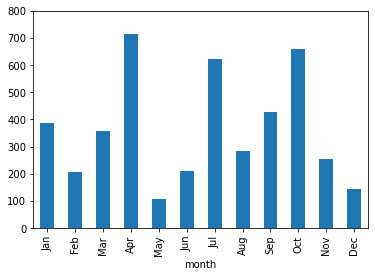

In [66]:
horror_average_profit_percent_monthly = ((genre_analysis_studio_horror.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_horror.groupby('month')['production_budget'].sum())-1)*100
#horror_average_profit_percent_monthly.plot.bar()
df = pd.DataFrame(horror_average_profit_percent_monthly)
df = df.reset_index()
#fig, ax = plt.subplots()
#ax.bar(horror_average_profit_percent_monthly.index, horror_average_profit_percent_monthly.values)
ax = df.set_index("month").loc[month_order].plot(kind="bar", legend=False)
ax.set_ylim(0,800)

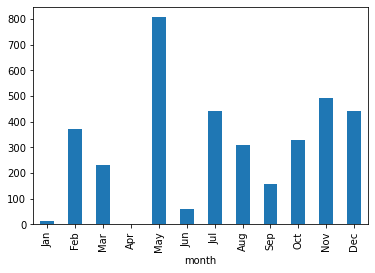

In [67]:
musical_average_profit_percent_monthly = ((genre_analysis_studio_musical.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_musical.groupby('month')['production_budget'].sum())-1)*100
musical_average_profit_percent_monthly['Apr'] = 0
df2 = pd.DataFrame(musical_average_profit_percent_monthly)
df2 = df2.reset_index()
ax = df2.set_index("month").loc[month_order].plot(kind="bar", legend=False)

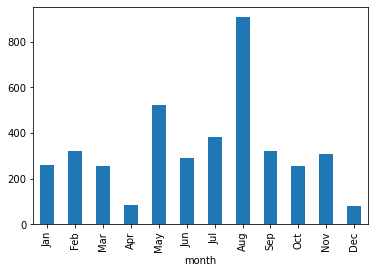

In [68]:
mystery_average_profit_percent_monthly = ((genre_analysis_studio_mystery.groupby('month')['worldwide_gross'].sum()) / (genre_analysis_studio_mystery.groupby('month')['production_budget'].sum())-1)*100
df3 = pd.DataFrame(mystery_average_profit_percent_monthly)
df3 = df3.reset_index()
ax = df3.set_index("month").loc[month_order].plot(kind="bar", legend=False)


## How does a movies success rate change as the budget increases

<AxesSubplot:xlabel='production_budget_m', ylabel='profit_margin_percent'>

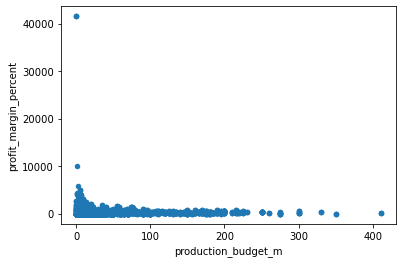

In [69]:
genre_analysis_genre.plot.scatter('production_budget_m','profit_margin_percent')

In [70]:
genre_analysis['budget_group'] = genre_analysis['production_budget'].map(lambda x: (x/1000000)//50)
dict = {0:'0-49', 1:'050-99', 2:'100-149', 3:'150-199', 4:'200-249', 5:'250-299', 6:'300-349', 7:'350-399', 8:'400+'}
genre_analysis['budget_group'] = genre_analysis['budget_group'].map(dict)
genre_analysis.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit_margin_percent,year,tconst,primary_title,original_title,start_year,runtime_minutes,genres,budget_group
name_year,,,,,,,,,,,,,,,
Pirates of the Caribbean: On Stranger Tides 2011,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,154.667286,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]",400+
Dark Phoenix 2019,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-57.210757,2019,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]",350-399
Avengers: Age of Ultron 2015,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,324.384139,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",300-349
Avengers: Infinity War 2018,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,582.711400,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]",300-349
Justice League 2017,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,118.648403,2017,tt0974015,Justice League,Justice League,2017,120.0,"[Action, Adventure, Fantasy]",300-349


<AxesSubplot:xlabel='budget_group'>

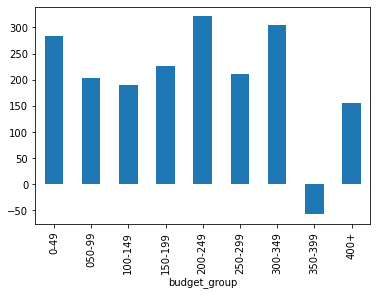

In [71]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar()

In [72]:
genre_analysis = genre_analysis[genre_analysis['profit_margin_percent'] > (0)]

<AxesSubplot:xlabel='budget_group'>

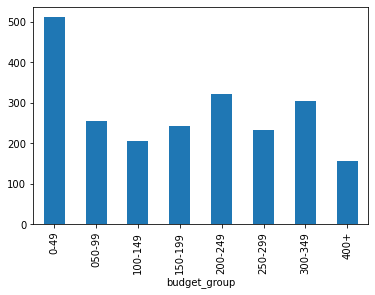

In [73]:
budget_analysis = genre_analysis.groupby('budget_group')['profit_margin_percent'].mean()
budget_analysis.plot.bar()